## ОЦЕНКА И УЛУЧШЕНИЕ КАЧЕСТВА МОДЕЛИ

In [42]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
import mglearn
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# создаем синтетический набор данных
X, y = make_blobs(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   random_state=0)
# создаем экземпляр модели и подгоняем его на обучающем наборе
logreg = LogisticRegression().fit(X_train, y_train)
logreg.score(X_test, y_test)

0.88

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression(max_iter=5000)

scores = cross_val_score(logreg, iris.data, iris.target)
print('Значения правильности перекрестной проверки: {}'. \
      format(scores))

Значения правильности перекрестной проверки: [0.96666667 1.         0.93333333 0.96666667 1.        ]


In [5]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print('Значения правильности перекрестной проверки: {}'. \
      format(scores))

Значения правильности перекрестной проверки: [0.96666667 1.         0.93333333 0.96666667 1.        ]


In [6]:
print("Средняя правильность перекрестной проверки: {:.2f}".format(
    scores.mean()))

Средняя правильность перекрестной проверки: 0.97


In [7]:
print('Метки ирисов:\n{}'.format(iris.target))

Метки ирисов:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


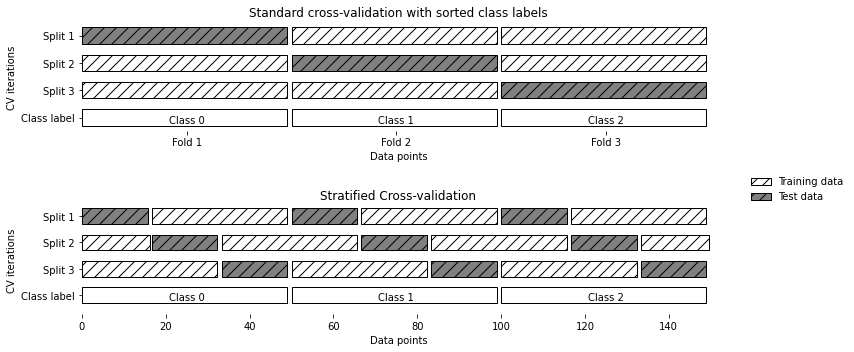

In [8]:
mglearn.plots.plot_stratified_cross_validation()

In [9]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5)
print("Значения правильности перекрестной проверки:\n{}".format(
cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Значения правильности перекрестной проверки:
[1.         1.         0.86666667 0.93333333 0.83333333]


In [10]:
kfold = KFold(n_splits=3)

print("Значения правильности перекрестной проверки:\n{}".format(
cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Значения правильности перекрестной проверки:
[0. 0. 0.]


In [11]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)

print("Значения правильности перекрестной проверки:\n{}".format(
cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Значения правильности перекрестной проверки:
[0.98 0.96 0.96]


In [12]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)

print("Количество итераций: ", len(scores))
print("Средняя правильность: {:.2f}".format(scores.mean()))

Количество итераций:  150
Средняя правильность: 0.97


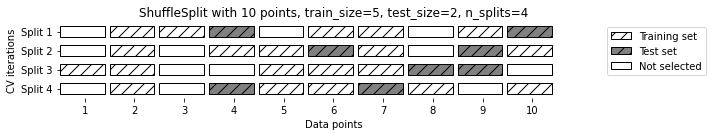

In [13]:
mglearn.plots.plot_shuffle_split()

In [14]:
from sklearn.model_selection import ShuffleSplit

snuffle_split = ShuffleSplit(test_size=.5, train_size=.5, 
                             n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target,
                        cv=snuffle_split)
print("Значения правильности перекрестной проверки:\n{}". \
      format(scores))

Значения правильности перекрестной проверки:
[0.96       0.97333333 0.97333333 0.93333333 0.96       0.96
 0.97333333 0.92       0.96       0.97333333]


In [15]:
from sklearn.model_selection import GroupKFold

# создам синтетический набор данных
X, y = make_blobs(n_samples=12, random_state=0)
# предположим, что первые три примера относятся к одной и той же 
# группе, затем следующие четыре и так далее
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups, 
                        cv=GroupKFold(n_splits=3))
print("Значения правильности перекрестной проверки:\n{}". \
      format(scores))

Значения правильности перекрестной проверки:
[0.75       0.6        0.66666667]


/home/miss/kaggle/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass groups=[0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [16]:
# реализация наивного решетчатого поиска
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(iris.data, 
                                iris.target, random_state=0)
print("Размер обучающего набора: {} размер тестового набора: {}". \
      format(X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # для каждой комбинации параметров обуаем SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # оцениваем качество SVC на тестовом наборе
        score = svm.score(X_test, y_test)
        # если получаем наилучшее значение правильности, сохраняем
        # значение и параметры
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

            print("Наилучшее значение правильности: {:.2f}". \
                  format(best_score))
print("Наилучшие значения параметров: {}".format(best_parameters))

Размер обучающего набора: 112 размер тестового набора: 38
Наилучшее значение правильности: 0.24
Наилучшее значение правильности: 0.58
Наилучшее значение правильности: 0.92
Наилучшее значение правильности: 0.97
Наилучшие значения параметров: {'C': 100, 'gamma': 0.001}


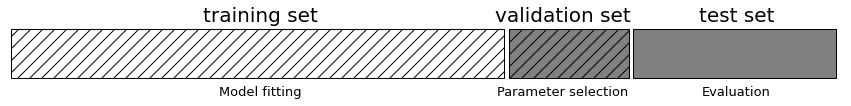

In [17]:
mglearn.plots.plot_threefold_split()

In [27]:
# разбиваем данные на обучающий+проверочный набор и тестовый набор
X_trainval, X_test, y_trainval, y_test = train_test_split(
    iris.data, iris.target, random_state=0)
# разбиваем обучющий+проверочный набор на обучающий и проверочный
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval,
                                    y_trainval, random_state=0)
print("Размер обучающего набора: {}\nРазмер проверочного набора:\
{}\nРазмер тестового набора: {}\n".format(X_train.shape[0],
                            X_valid.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # для каждой комбинации параметров обучаем SVC
        svm = SVC(gamma=gamma, C=C).fit(X_train, y_train)
        # оцениваем качество SVC на проверочном наборе
        score = svm.score(X_valid, y_valid)
        # если получаем наилучшее значение правильности, 
        # сохраняем значение и параметры
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
# заново строим модель на наборе, полученном в результате 
# объединения обучающих и проверочных данных, 
# оцениваем качество модели на тестовом наборе
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Лучшее значение правильности на проверочном наборе: \
{:.2f}".format(best_score))
print("Наилучшие значения параметров: ", best_parameters)
print("Правильность на тестовом наборе с наилучшими параметрами: \
{:.2f}".format(test_score))

Размер обучающего набора: 84
Размер проверочного набора:28
Размер тестового набора: 38

Лучшее значение правильности на проверочном наборе: 1.00
Наилучшие значения параметров:  {'C': 100, 'gamma': 0.001}
Правильность на тестовом наборе с наилучшими параметрами: 0.97


In [29]:
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # для каждой комбинации параметров,
        # обучаем SVC
        svm = SVC(gamma=gamma, C=C)
        # выполняем перекрестную проверку
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        # вычисляем среднюю правильность перекрестной проверки
        score = np.mean(scores)
        # если получаем лучшее значение правильности, 
        # сохраняем значение и параметры
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
# заново строим модель на наборе, полученном в результате
# объединения обучающих и проверочных данных
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=100, gamma=0.001)

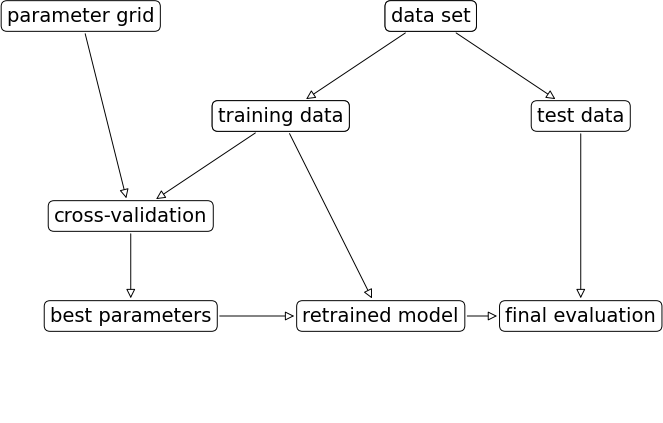

In [31]:
mglearn.plots.plot_grid_search_overview()

In [32]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Сетка параметров:\n{}".format(param_grid))

grid_search = GridSearchCV(SVC(), param_grid, cv=5)

X_train, x_test, y_train, y_test = train_test_split(iris.data, 
                            iris.target, random_state=0)

grid_search.fit(X_train, y_train)
print("Правильность на тестовом наборе: {:.2f}".format(
    grid_search.score(X_test, y_test)))

Сетка параметров:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
Правильность на тестовом наборе: 0.97


In [34]:
print("Наилучшие значения параметров: {}".format(
    grid_search.best_params_))
print("Наилучшее значение кросс-валидац. правильности: \
{:.2f}".format(grid_search.best_score_))
print("Наилучшая модель:\n{}".format(grid_search.best_estimator_))

Наилучшие значения параметров: {'C': 10, 'gamma': 0.1}
Наилучшее значение кросс-валидац. правильности: 0.97
Наилучшая модель:
SVC(C=10, gamma=0.1)


In [36]:
import pandas as pd

#  преобразуем в DataFrame
results = pd.DataFrame(grid_search.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001187,0.000072,0.000493,0.000035,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
1,0.001213,0.000105,0.000557,0.000084,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
2,0.000857,0.000156,0.000362,0.000066,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
3,0.000757,0.000113,0.000336,0.000070,0.001,1,"{'C': 0.001, 'gamma': 1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
4,0.000779,0.000064,0.000311,0.000027,0.001,10,"{'C': 0.001, 'gamma': 10}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22


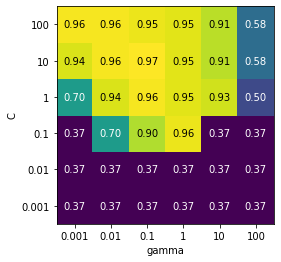

In [38]:
scores = np.array(results.mean_test_score).reshape(6, 6)

# строим теплокарту средних знач. правильности перекрестной проверки
mglearn.tools.heatmap(scores, xlabel='gamma', 
                     xticklabels=param_grid['gamma'], ylabel='C', 
                    yticklabels=param_grid['C'], cmap='viridis')

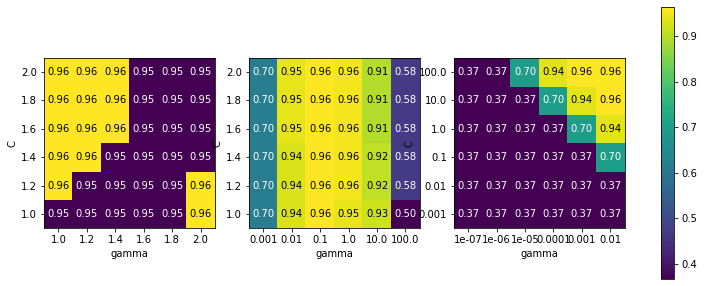

In [43]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
param_grid_linear = {'C': np.linspace(1, 2, 6),
'gamma': np.linspace(1, 2, 6)}
param_grid_one_log = {'C': np.linspace(1, 2, 6),
'gamma': np.logspace(-3, 2, 6)}
param_grid_range = {'C': np.logspace(-3, 2, 6),
'gamma': np.logspace(-7, -2, 6)}
for param_grid, ax in zip([param_grid_linear, param_grid_one_log,
    param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score']. \
    reshape(6, 6)
    # строим теплокарту ср. знач. правильности перекрестной проверки
    scores_image = mglearn.tools.heatmap(
    scores, xlabel='gamma', ylabel='C', 
        xticklabels=param_grid['gamma'],
    yticklabels=param_grid['C'], cmap="viridis", ax=ax)
plt.colorbar(scores_image, ax=axes.tolist())